# Plataforma de Análisis Estadístico de Incidencias Viales

Bootcamp: Fundamentos en Análisis de Datos e Inteligencia Artificial  
Autor: Daniel Alfredo Barahona Cordova, Rodrigo Daniel Rivas Pérez, Estefany Yaneth Torres Serrano
Fecha: [19/02/2025]

---

## Descripción

Este proyecto tiene como objetivo analizar estadísticamente las incidencias viales registradas en el Observatorio Nacional de Seguridad Vial, identificando patrones temporales y tipológicos, así como implementar un modelo de clasificación supervisada para predecir la naturaleza del siniestro.


## Objetivo General

Analizar los registros de siniestros viales correspondientes a los años 2024 y 2025 para identificar patrones relevantes y desarrollar un modelo de clasificación supervisada.

## Objetivos Específicos

- Integrar y limpiar los datos provenientes de ambos años.
- Analizar la distribución temporal (mes, día y hora).
- Evaluar la distribución por naturaleza del siniestro.
- Comparar el comportamiento interanual (enero-octubre).
- Implementar y evaluar un modelo de clasificación multiclase.


## Fuente de Datos

Los datos fueron obtenidos del Observatorio Nacional de Seguridad Vial (FONAT).

Se utilizaron registros correspondientes a:
- Año 2024 (sin datos de noviembre y diciembre).
- Año 2025.

Ambos conjuntos fueron integrados en un único dataset para ampliar la base de análisis.


## Metodología

El desarrollo del proyecto se estructuró en las siguientes fases:

1. Integración de datos 2024–2025.
2. Limpieza y transformación de variables.
3. Análisis exploratorio de datos (EDA).
4. Comparación interanual considerando únicamente meses comunes.
5. Implementación de modelo de clasificación supervisada.
6. Evaluación del desempeño del modelo.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
plt.style.use("ggplot")
%matplotlib inline

In [2]:
# Cargar archivos
df_2024 = pd.read_excel("Observatorio Nacional de Seguridad Víal (1).xlsx")
df_2025 = pd.read_excel("Observatorio Nacional de Seguridad Víal (2).xlsx")

# Unir datasets
df = pd.concat([df_2024, df_2025], ignore_index=True)

# Verificar
df["Año"].value_counts()



Año
2025    1235
2024     975
Name: count, dtype: int64

In [3]:
print(df_2024.columns)
print(df_2025.columns)


Index(['Año', 'Mes', 'Día', 'Rango de hora', 'Departamento', 'Distrito',
       'Dirección', 'Naturaleza', 'Vehículo responsable', 'Causa', 'Sexo',
       'Rango de edad'],
      dtype='str')
Index(['Año', 'Mes', 'Día', 'Rango de hora', 'Departamento', 'Distrito',
       'Dirección', 'Naturaleza', 'Vehículo responsable', 'Causa', 'Sexo',
       'Rango de edad'],
      dtype='str')


In [4]:
# Información general
df.info()

# Revisión de valores nulos
df.isnull().sum()

# Revisar duplicados
df.duplicated().sum()



<class 'pandas.DataFrame'>
RangeIndex: 2210 entries, 0 to 2209
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Año                   2210 non-null   int64
 1   Mes                   2210 non-null   str  
 2   Día                   2210 non-null   str  
 3   Rango de hora         2210 non-null   str  
 4   Departamento          2210 non-null   str  
 5   Distrito              2210 non-null   str  
 6   Dirección             2210 non-null   str  
 7   Naturaleza            2210 non-null   str  
 8   Vehículo responsable  2210 non-null   str  
 9   Causa                 2210 non-null   str  
 10  Sexo                  2210 non-null   str  
 11  Rango de edad         2210 non-null   str  
dtypes: int64(1), str(11)
memory usage: 207.3 KB


np.int64(11)

In [5]:
# Limpieza de texto
df["Mes"] = df["Mes"].str.capitalize()
df["Día"] = df["Día"].str.capitalize()

df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Transformar Rango de hora
df["Hora_inicio"] = df["Rango de hora"].str.split("-").str[0]
df["Hora_inicio"] = df["Hora_inicio"].str.strip().astype(int)

df[["Rango de hora", "Hora_inicio"]].head()


,Rango de hora,Hora_inicio
0,12 - 13,12
1,08 - 09,8
2,10 - 11,10
3,08 - 09,8
4,02 - 03,2


### Nota Metodológica

Debido a que el año 2024 no contiene registros de noviembre y diciembre, las comparaciones interanuales se realizaron únicamente considerando los meses de enero a octubre.


In [6]:
# ==============================
# Orden correcto de meses
# ==============================

orden_meses = [
    "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
    "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
]

df["Mes"] = pd.Categorical(df["Mes"], categories=orden_meses, ordered=True)


In [7]:
meses_comunes = [
    "Enero","Febrero","Marzo","Abril","Mayo",
    "Junio","Julio","Agosto","Septiembre","Octubre"
]

df_comparable = df[df["Mes"].isin(meses_comunes)]


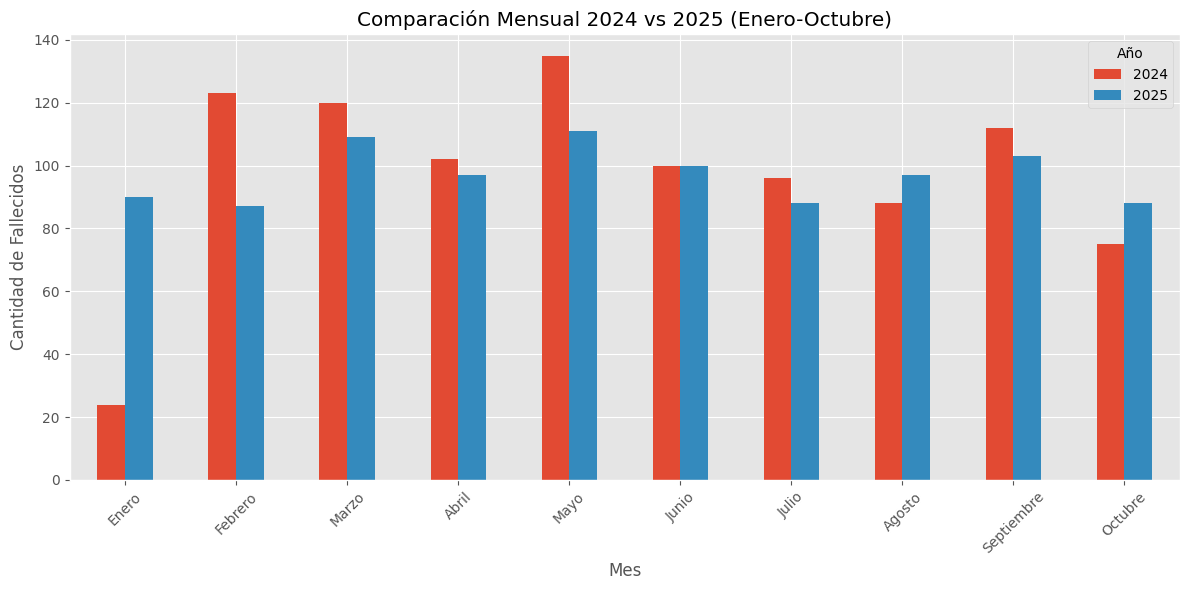

In [8]:
tabla_mes_anio = (
    df_comparable
    .groupby(["Mes", "Año"])
    .size()
    .unstack()
)

tabla_mes_anio = tabla_mes_anio.loc[meses_comunes]

tabla_mes_anio.plot(kind="bar", figsize=(12,6))

plt.title("Comparación Mensual 2024 vs 2025 (Enero-Octubre)")
plt.ylabel("Cantidad de Fallecidos")
plt.xlabel("Mes")
plt.xticks(rotation=45)
plt.legend(title="Año")
plt.tight_layout()
plt.show()


### Interpretación

Al comparar los meses de enero a octubre entre 2024 y 2025, se identifican variaciones en la cantidad de siniestros registrados.
En algunos meses se observa un incremento respecto al año anterior, lo que podría indicar cambios en patrones de movilidad o condiciones viales.
Es importante señalar que la comparación excluye noviembre y diciembre debido a la ausencia de datos en 2024.


In [9]:
tabla_mes_anio["Variacion_%"] = (
    (tabla_mes_anio[2025] - tabla_mes_anio[2024])
    / tabla_mes_anio[2024]
) * 100

tabla_mes_anio


Año,2024,2025,Variacion_%
Mes,,,
Enero,24,90,275.000000
Febrero,123,87,-29.268293
Marzo,120,109,-9.166667
Abril,102,97,-4.901961
Mayo,135,111,-17.777778
Junio,100,100,0.000000
Julio,96,88,-8.333333
Agosto,88,97,10.227273
Septiembre,112,103,-8.035714


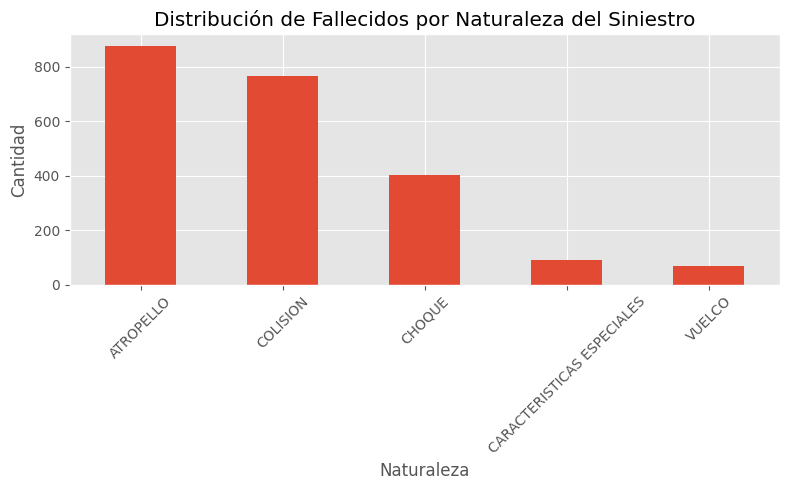

In [10]:
plt.figure(figsize=(8,5))
df["Naturaleza"].value_counts().plot(kind="bar")

plt.title("Distribución de Fallecidos por Naturaleza del Siniestro")
plt.ylabel("Cantidad")
plt.xlabel("Naturaleza")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Interpretación

La categoría "Atropello" presenta la mayor cantidad de registros, seguida por "Colisión". 
Esto evidencia un desbalance en la distribución de clases, lo cual influye directamente en el desempeño del modelo de clasificación.
Las categorías como "Vuelco" y "Características Especiales" presentan menor frecuencia, lo que explica la dificultad del modelo para predecirlas correctamente.


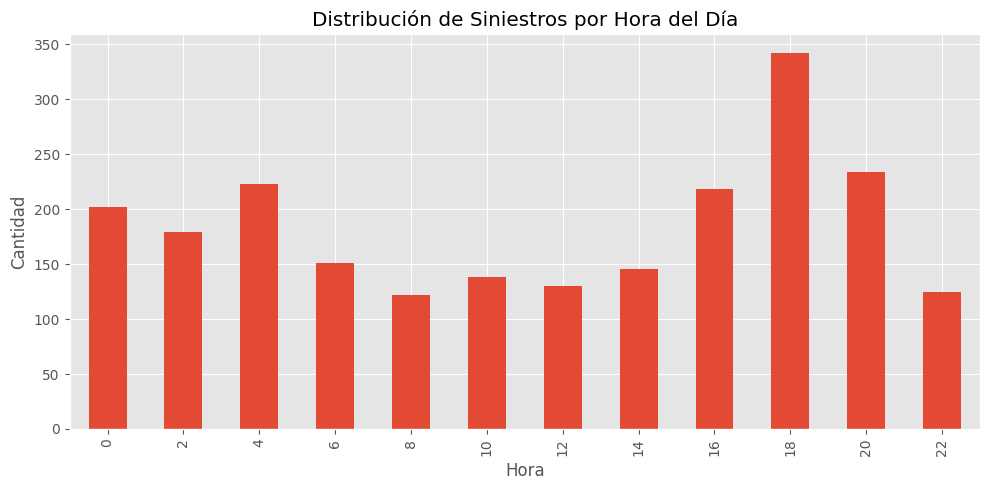

In [11]:
plt.figure(figsize=(10,5))
df["Hora_inicio"].value_counts().sort_index().plot(kind="bar")

plt.title("Distribución de Siniestros por Hora del Día")
plt.ylabel("Cantidad")
plt.xlabel("Hora")
plt.tight_layout()
plt.show()


### Interpretación

Se observa una mayor concentración de siniestros en las horas de la tarde y noche. 
Este patrón podría estar relacionado con el aumento del tráfico vehicular y condiciones de visibilidad reducida.
Identificar estas franjas horarias críticas puede ser útil para implementar medidas preventivas focalizadas.


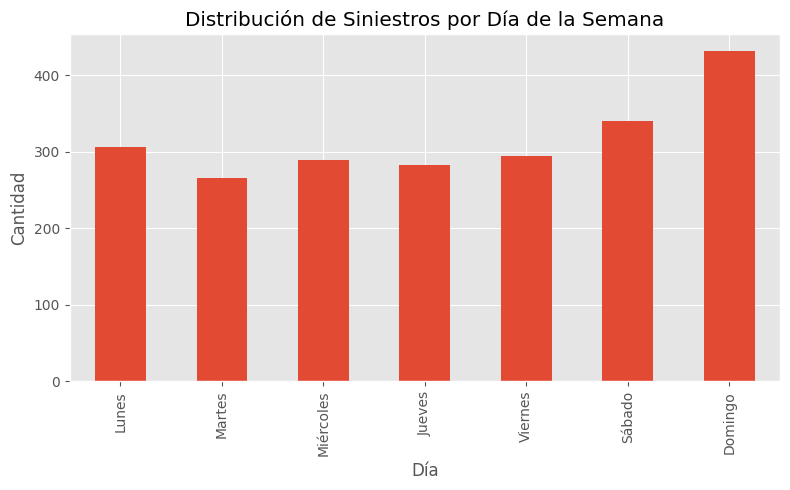

In [12]:
orden_dias = ["Lunes","Martes","Miércoles","Jueves","Viernes","Sábado","Domingo"]

conteo_dias = df["Día"].value_counts().reindex(orden_dias)

plt.figure(figsize=(8,5))
conteo_dias.plot(kind="bar")

plt.title("Distribución de Siniestros por Día de la Semana")
plt.ylabel("Cantidad")
plt.xlabel("Día")
plt.tight_layout()
plt.show()


## Modelo de Clasificación Supervisada

Se implementó un modelo de Machine Learning para predecir la naturaleza del siniestro vial a partir de variables temporales.

Se dividió el dataset en conjuntos de entrenamiento (70%) y prueba (30%).


In [13]:
resumen_anual = df_comparable.groupby("Año").size()
resumen_anual


Año
2024    975
2025    970
dtype: int64

In [14]:
# ==============================
# Preparación para Machine Learning
# ==============================

# Definir variable objetivo
y = df["Naturaleza"]

# Seleccionar variables predictoras
X = df[[
    "Departamento",
    "Vehículo responsable",
    "Causa",
    "Sexo",
    "Rango de edad",
    "Hora_inicio"
]]

# Convertir variables categóricas en variables numéricas
X = pd.get_dummies(X, drop_first=True)

print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)


Dimensiones de X: (2210, 65)
Dimensiones de y: (2210,)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42
)

print("Datos de entrenamiento:", X_train.shape)
print("Datos de prueba:", X_test.shape)


Datos de entrenamiento: (1547, 65)
Datos de prueba: (663, 65)


In [16]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000, class_weight="balanced")

modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)


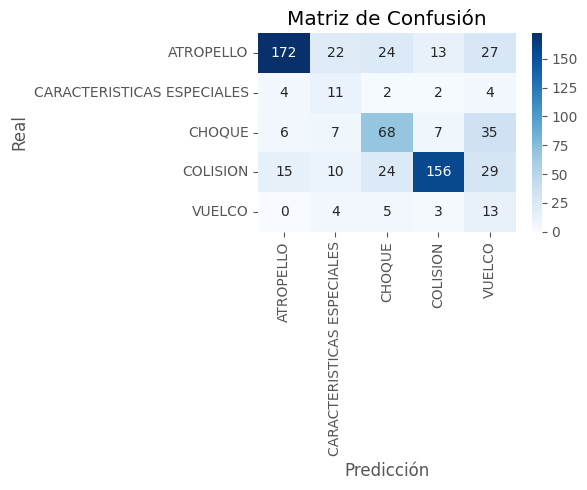

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=modelo.classes_,
            yticklabels=modelo.classes_)

plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.6334841628959276

Reporte de Clasificación:

                            precision    recall  f1-score   support

                 ATROPELLO       0.87      0.67      0.76       258
CARACTERISTICAS ESPECIALES       0.20      0.48      0.29        23
                    CHOQUE       0.55      0.55      0.55       123
                  COLISION       0.86      0.67      0.75       234
                    VUELCO       0.12      0.52      0.20        25

                  accuracy                           0.63       663
                 macro avg       0.52      0.58      0.51       663
              weighted avg       0.76      0.63      0.68       663



In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6334841628959276


### Análisis del Desempeño

El modelo presentó una precisión general aceptable. 
Sin embargo, se identificó desbalance en las categorías, lo que afectó la capacidad predictiva en clases minoritarias.

La aplicación de `class_weight="balanced"` permitió mejorar el recall en categorías poco frecuentes, aunque redujo la precisión global, evidenciando un trade-off típico en problemas multiclase.


## Evaluación del Modelo de Clasificación

Se consolidaron los datos correspondientes a los años 2024 y 2025 en un único dataset para ampliar la base de entrenamiento y mejorar la robustez del modelo.

El modelo de clasificación supervisada fue entrenado utilizando esta información combinada, permitiendo evaluar patrones más amplios en la naturaleza de los siniestros viales.

Es importante señalar que el año 2024 no contiene registros de noviembre y diciembre; por lo tanto, las comparaciones interanuales se realizaron únicamente considerando los meses comunes (enero-octubre).



## Ajuste por Desbalance de Clases

Para mitigar el efecto del desbalance, se aplicó el parámetro `class_weight="balanced"` durante el entrenamiento del modelo.

Este ajuste permitió mejorar significativamente la detección de categorías minoritarias:

- El recall de "Vuelco" aumentó de 0.00 a 0.52.
- También se observó mejora en "Características Especiales".

No obstante, la precisión global del modelo disminuyó de 0.74 a 0.63, evidenciando un trade-off entre desempeño general y equidad en la clasificación.


## Análisis del Trade-off

El uso de balanceo de clases generó un compromiso entre:

- Mayor capacidad de detección en categorías poco frecuentes.
- Reducción en la precisión global del modelo.

Este comportamiento es común en problemas de clasificación multiclase con desbalance, donde optimizar la exactitud total puede llevar a ignorar clases minoritarias.

Desde una perspectiva de seguridad vial, mejorar la detección de categorías menos frecuentes puede ser relevante si estas representan eventos de alto riesgo.


## Limitaciones del Modelo

- El modelo utiliza principalmente variables temporales, lo que limita su capacidad predictiva.
- Existe desbalance significativo entre las categorías de siniestros.
- Los datos del año 2024 no incluyen noviembre ni diciembre, por lo que el análisis interanual se realizó únicamente con meses comparables (enero-octubre).
- No se incorporaron variables geográficas ni factores humanos detallados que podrían mejorar el desempeño del modelo.


## Conclusiones

La integración de datos correspondientes a los años 2024 y 2025 permitió ampliar el análisis y mejorar la estabilidad del modelo de clasificación.

El análisis interanual (enero-octubre) evidenció variaciones en la distribución mensual de los siniestros, lo que sugiere patrones temporales que pueden ser útiles para la planificación preventiva.

El modelo de clasificación supervisada mostró una precisión general aceptable. La aplicación de balanceo de clases mejoró la detección de categorías minoritarias como "Vuelco", aunque redujo la precisión global, evidenciando el compromiso entre exactitud y equidad en problemas multiclase.

Los resultados obtenidos constituyen una base preliminar para el desarrollo de sistemas predictivos más completos que incorporen variables adicionales, como ubicación geográfica y factores humanos, con el fin de fortalecer la toma de decisiones en seguridad vial.



## Trabajo Futuro

- Incorporar variables geográficas y contextuales.
- Aplicar técnicas avanzadas de balanceo como SMOTE.
- Evaluar modelos adicionales (XGBoost, Gradient Boosting).
- Desarrollar una visualización interactiva en Looker Studio.
